# Correlation analysis 

This notebook is for analysising the correlation between different configurations. 
For the unaries, there are 4 subplots for GS (Ground state structures v.s. ALL), 3 for BCC vs (FCC, SC, Diamond), 2 for FCC vs (SC, Diamond), SC v.s Diamond.
For oxides, ??
For unaries v.s oxides ??

The data are read from the json output of every element.

In [7]:
%matplotlib inline

In [8]:
import json

In [9]:
import os
import pathlib

SSSP_DB_PATH = pathlib.Path(os.path.join("..", "sssp_db")) 
elements = [os.path.splitext(i)[0] for i in os.listdir(SSSP_DB_PATH) if ".json" in i]

In [75]:
def extract(x_key, y_key, data, idx_name, psp_type=None):
    xs = []
    ys = []
    
    for key, value in data.items():
        if psp_type and psp_type not in key:
            continue
        
        accuracy_output = value.get("accuracy", {}).get("delta", {}).get("output_parameters", None)
        
        x = accuracy_output.get(x_key, {}).get(idx_name, 999)
        y = accuracy_output.get(y_key, {}).get(idx_name, 999)
        
        if x < 5.0 and y < 5.0:
            xs.append(x)
            ys.append(y)
    
    return xs, ys    

In [76]:
def all_element_data_extract(elements, x_key, y_key, idx_name, psp_type=None):
    xss = []
    yss = []
    for e in elements:
        with open(os.path.join(SSSP_DB_PATH, f"{e}.json")) as fh:
            data = json.load(fh)
        xs, ys = extract(x_key, y_key, data=data, idx_name=idx_name, psp_type=psp_type)
        
        xss += xs
        yss += ys
        
    return xss, yss

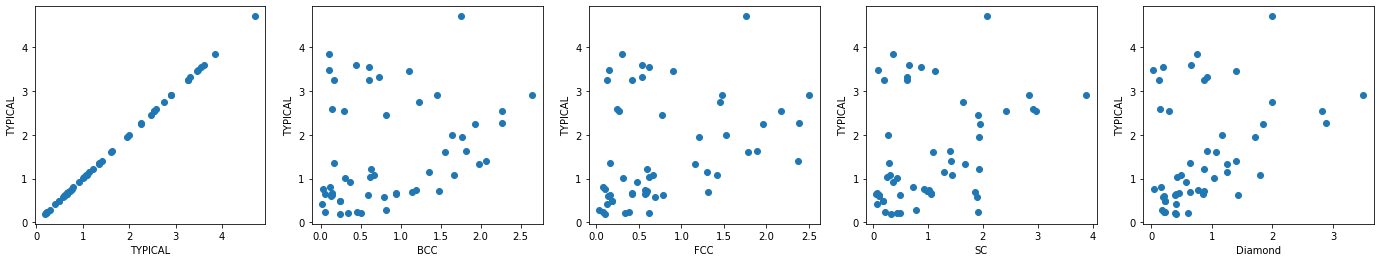

In [80]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(24, 4))

ref_conf = "TYPICAL"
idp = "nu"

for i, c in enumerate(["TYPICAL", "BCC", "FCC", "SC", "Diamond"]):
    xss, yss = all_element_data_extract(elements, c, ref_conf, idp, "us")
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel(ref_conf)

Text(0.5, 0.98, 'accuracy correlation of unaries: BCC with others')

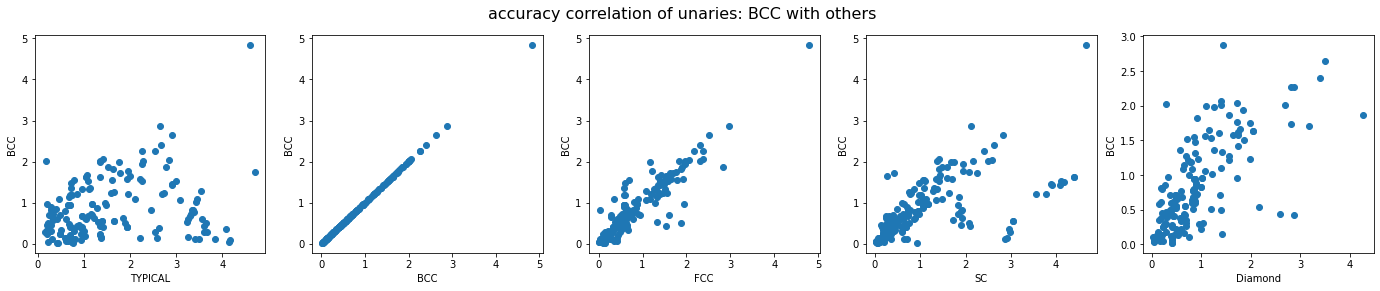

In [79]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(24, 4))

ref_conf = "BCC"
idp = "nu"

for i, c in enumerate(["TYPICAL", "BCC", "FCC", "SC", "Diamond"]):
    xss, yss = all_element_data_extract(elements, c, ref_conf, idp)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel(ref_conf)
    
fig.suptitle('accuracy correlation of unaries: BCC with others', fontsize=16)

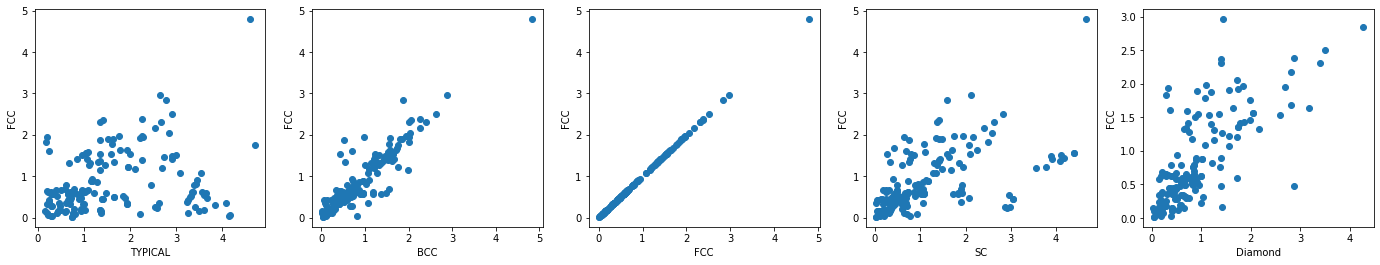

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(24, 4))

ref_conf = "FCC"
idp = "nu"

for i, c in enumerate(["TYPICAL", "BCC", "FCC", "SC", "Diamond"]):
    xss, yss = all_element_data_extract(elements, c, ref_conf, idp)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel(ref_conf)

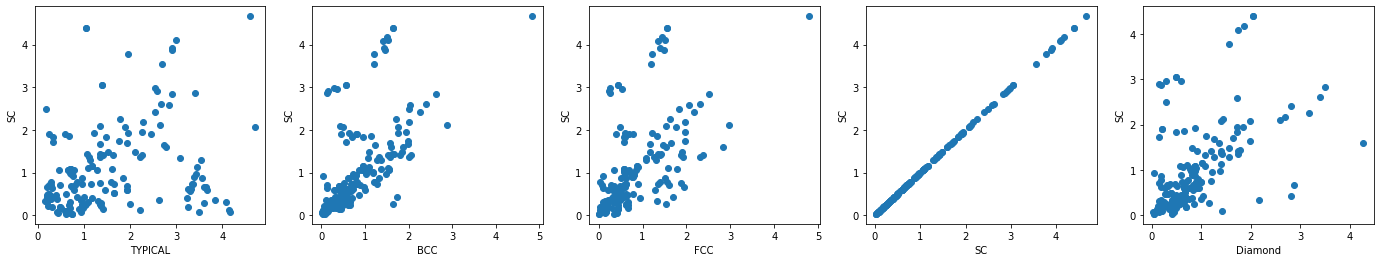

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(24, 4))

ref_conf = "SC"
idp = "nu"

for i, c in enumerate(["TYPICAL", "BCC", "FCC", "SC", "Diamond"]):
    xss, yss = all_element_data_extract(elements, c, ref_conf, idp)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel(ref_conf)

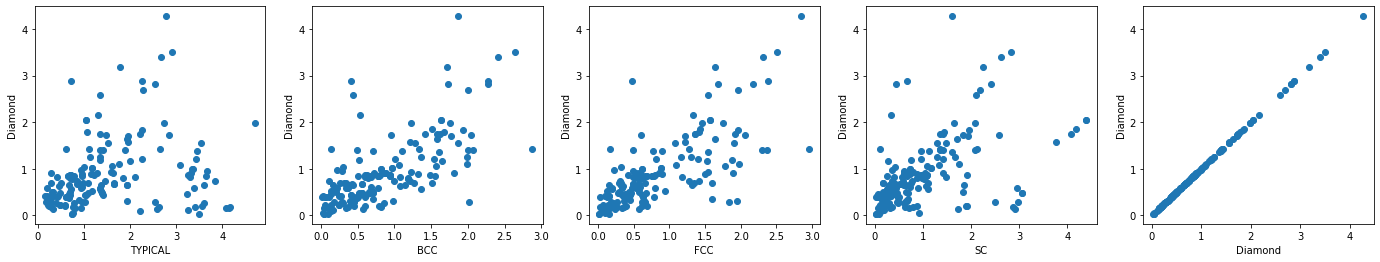

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(24, 4))

ref_conf = "Diamond"
idp = "nu"

for i, c in enumerate(["TYPICAL", "BCC", "FCC", "SC", "Diamond"]):
    xss, yss = all_element_data_extract(elements, c, ref_conf, idp)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel(ref_conf)

Text(0.5, 0.98, 'accuracy correlation of oxides: XO with others (nu/natoms)')

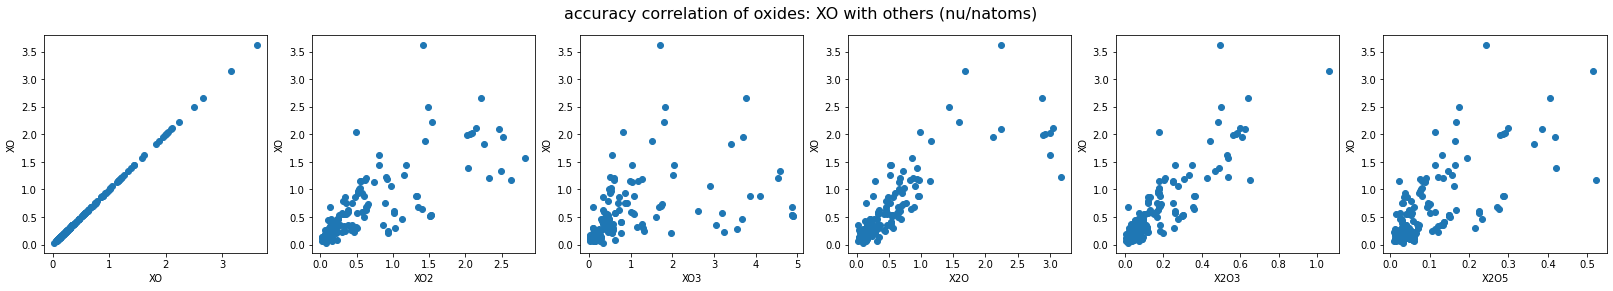

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(28, 4))

ref_conf = "XO"
idp = "nu/natoms"

for i, c in enumerate(["XO", "XO2", "XO3", "X2O", "X2O3", "X2O5"]):
    xss, yss = all_element_data_extract(elements, c, ref_conf, idp)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel(ref_conf)
    
fig.suptitle('accuracy correlation of oxides: XO with others (nu/natoms)', fontsize=16)

Text(0.5, 0.98, 'accuracy correlation of oxides: XO with others (nu)')

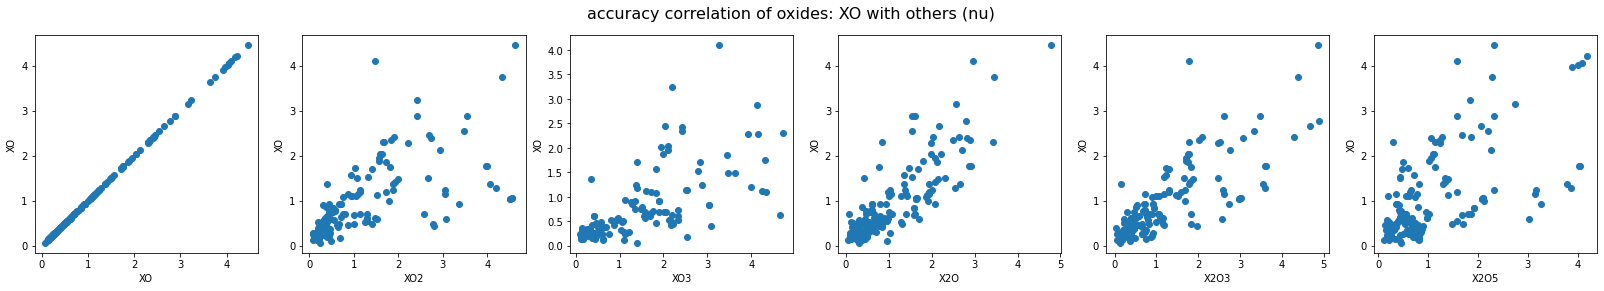

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(28, 4))

ref_conf = "XO"
idp = "nu"

for i, c in enumerate(["XO", "XO2", "XO3", "X2O", "X2O3", "X2O5"]):
    xss, yss = all_element_data_extract(elements, c, ref_conf, idp)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel(ref_conf)
    
fig.suptitle('accuracy correlation of oxides: XO with others (nu)', fontsize=16)

Text(0.5, 0.98, 'accuracy correlation of oxides: XO with others (delta)')

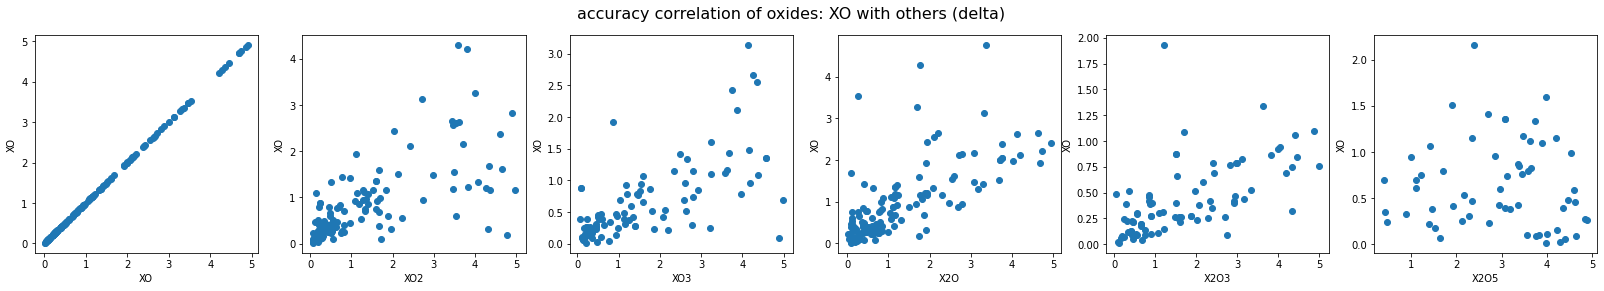

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 6, figsize=(28, 4))

ref_conf = "XO"
idp = "delta"

for i, c in enumerate(["XO", "XO2", "XO3", "X2O", "X2O3", "X2O5"]):
    xss, yss = all_element_data_extract(elements, c, ref_conf, idp)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(c)
    axes[i].set_ylabel(ref_conf)
    
fig.suptitle('accuracy correlation of oxides: XO with others (delta)', fontsize=16)

In [49]:
# proof nu and delta are same of similar (?? what about delta1)

def extract_on_measure(n0_key, n1_key):
    xs = []
    ys = []
    ns = []
    for e in elements:
        with open(os.path.join(SSSP_DB_PATH, f"{e}.json")) as fh:
            data = json.load(fh)
            
            for key, value in data.items():
                accuracy_delta = value.get("accuracy", {}).get("delta", {})
                
                for conf, d in accuracy_delta.items():
                    x = d.get("output_parameters", {}).get(n0_key, 999)
                    y = d.get("output_parameters", {}).get(n1_key, 999)
                    n = d.get("output_parameters", {}).get("natoms", 999)
                
                    if x < 5.0 and y < 5.0:
                        xs.append(x)
                        ys.append(y)
                        ns.append(n)
        
    return xs, ys, ns

Text(0.5, 0.98, 'accuracy correlation of oxides: XO with others (delta)')

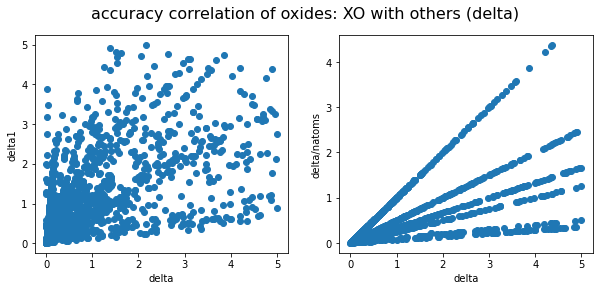

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

n0_key = "delta"

for i, n1_key in enumerate(["delta1", "delta/natoms"]):
    xss, yss, _ = extract_on_measure(n0_key, n1_key)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(n0_key)
    axes[i].set_ylabel(n1_key)
    
fig.suptitle('accuracy correlation of oxides: XO with others (delta)', fontsize=16)

Text(0.5, 0.98, 'accuracy correlation of oxides: XO with others (delta)')

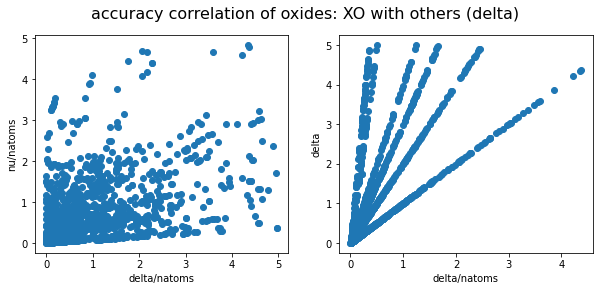

In [52]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

n0_key = "delta/natoms"

for i, n1_key in enumerate(["nu/natoms", "delta"]):
    xss, yss, _ = extract_on_measure(n0_key, n1_key)
    axes[i].scatter(xss, yss)
    axes[i].set_xlabel(n0_key)
    axes[i].set_ylabel(n1_key)
    
fig.suptitle('accuracy correlation of oxides: XO with others (delta)', fontsize=16)

Text(0.5, 0.98, 'accuracy correlation of nu v.s delta1')

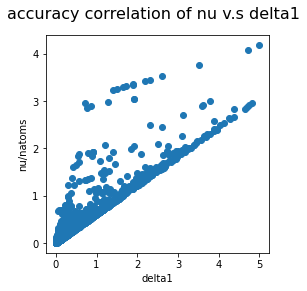

In [59]:
# delta1/natoms v.s nu/natoms
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

n0_key = "delta1"
n1_key = "nu/natoms"

xss, yss, ns = extract_on_measure(n0_key, n1_key)
ax.scatter(np.array(xss)/np.array(ns), yss)
ax.set_xlabel(n0_key)
ax.set_ylabel(n1_key)
    
fig.suptitle('accuracy correlation of nu v.s delta1', fontsize=16)